Цель проекта:

Проанализировать рынок компьютерных игр, с целью создания максимально эффективной и прибыльной маркетинговой стратегии


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import math

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [35]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [36]:
#  приведем название столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [37]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [38]:
data.loc[data[data['name'].isnull()].index.tolist()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [39]:
# удадим строки с пропущенными значаниями в столбце "Имя", так как эти строки не информативные 
data.drop([659, 14244], inplace=True)

In [41]:
# заполним пропуски в годе выпуска по моде, удалим дубликаты
year_of_release = data.groupby('name')['year_of_release'].apply(lambda x: x.mode())
year_of_release.index = year_of_release.index.droplevel(1)
year_of_release = pd.DataFrame(year_of_release.reset_index())
year_of_release = year_of_release.drop_duplicates('name')

In [42]:
# переименуем колонки в таблице, для последующего обьединения
year_of_release = year_of_release.rename(columns = {'year_of_release' :'mode'})

In [44]:
# соединим две таблицы
data = data.merge(year_of_release, how='left', on="name")

In [45]:
# data.isnull().sum()

In [46]:
# удалим дубликаты
data = data.drop_duplicates()

In [47]:
# заполним пропуски модой
data['year_of_release'] = data['year_of_release'].fillna(data['mode'])

In [48]:
data['critic_score'] = data['critic_score'].fillna(0)

In [49]:
# заполним пропуски
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].replace('tbd', 0)
data['user_score'] = data['user_score'].astype(float)

In [50]:
data['rating'] = data['rating'].fillna(0)

In [51]:
# удалим данные, для которых не получилось заполнить пропуски 
data = data.dropna()

In [52]:
# посчитаем общие продажи по всем регионам
data['total_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales']

In [53]:
del data['mode']

In [54]:
# data.info()

In [55]:
# поменяем тип данных у столбцов год выпуска, оценка пользователя 
data['year_of_release'] = data['year_of_release'].astype(int)

In [56]:
# data.info()

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

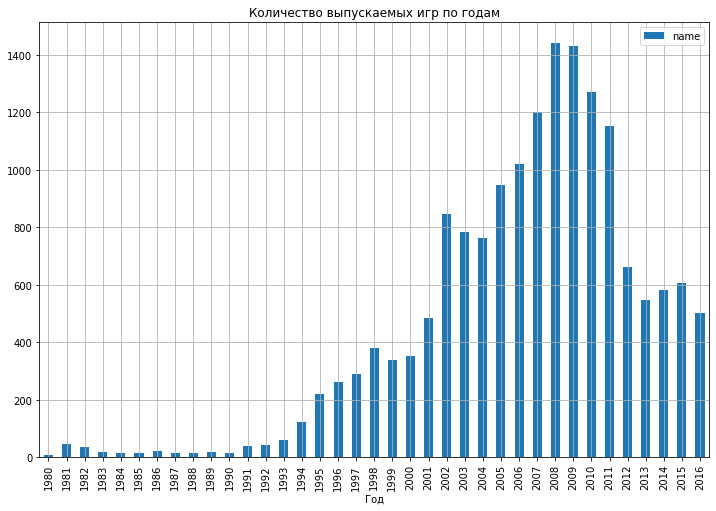

In [57]:
year_release_data = data.pivot_table(index ='year_of_release', values = 'name', aggfunc='count').plot(figsize=(12,8), grid=True, kind='bar')
plt.xlabel('Год');
plt.title('Количество выпускаемых игр по годам');

Шаг 3. Проведите исследовательский анализ данных

Посмотрите, как менялись продажи по платформам. 

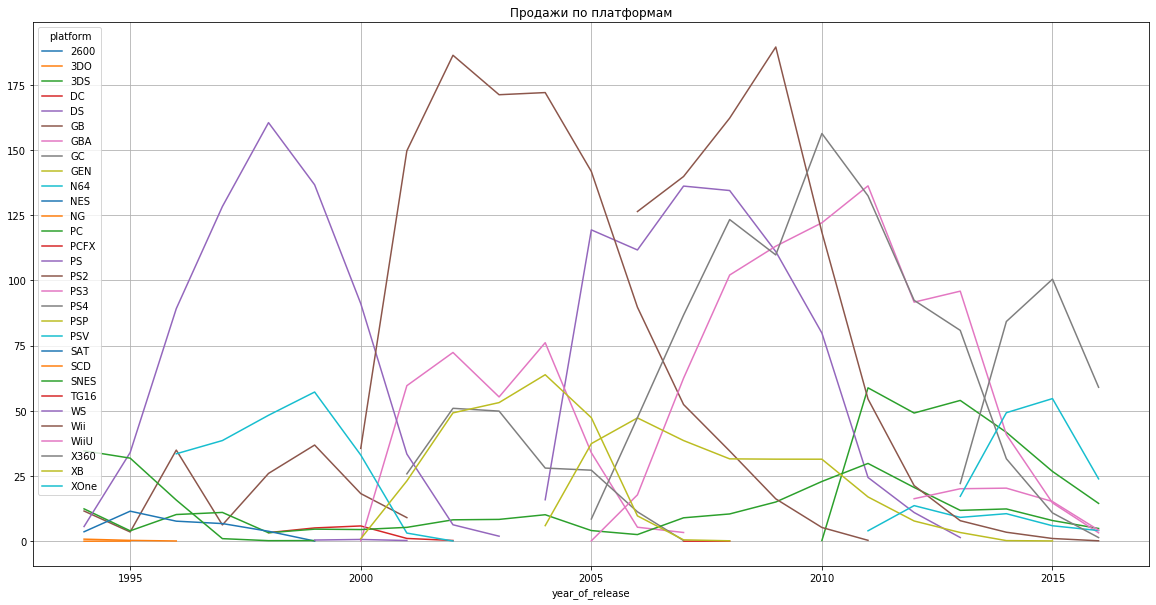

In [75]:
data = data.query('year_of_release >=1994')
data.pivot_table(index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20,10), grid=True);
plt.title('Продажи по платформам');

Мы видим, что в основном редко когда у платформы бывает два пика продаж. Может предположить, что это или удачные предпродажи игр, или позднее выпущенные дополнения. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

За какой характерный срок появляются новые и исчезают старые платформы

In [82]:
top_sales_platform = data.pivot_table(index ='platform', values='total_sales', aggfunc='sum').sort_values(by ='total_sales', ascending=False).reset_index().head(16)

In [83]:
top_sales_platform

,platform,total_sales
0,PS2,1054.88
1,X360,881.27
2,Wii,824.54
3,PS3,800.09
4,DS,745.10
5,PS,686.89
6,GBA,306.11
7,PS4,265.79
8,PSP,252.15
9,XB,248.01


In [90]:
top_sales = top_sales_platform['platform'].tolist()

In [91]:
sales_stat = data.query('platform in (@top_sales)')

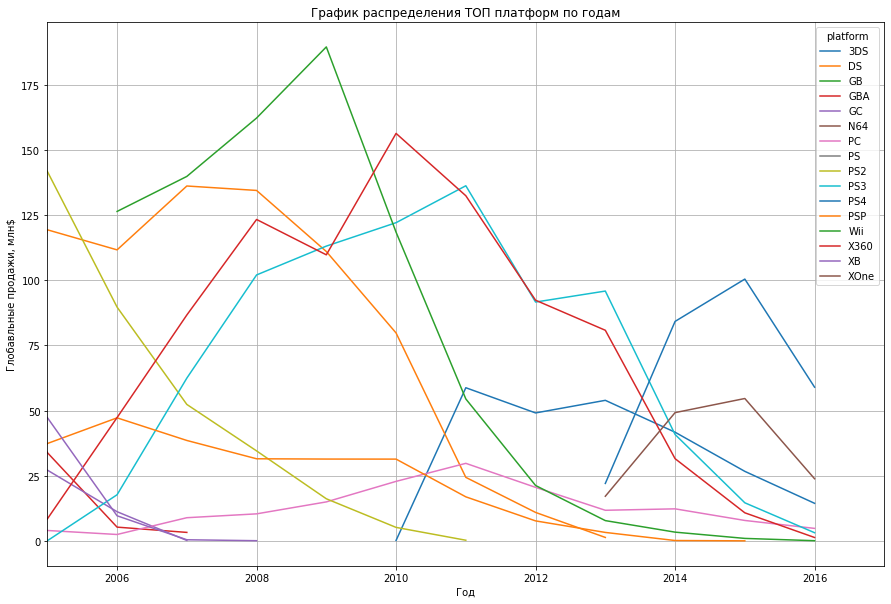

In [93]:
sales_stat.pivot_table(index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10), grid=True, xlim=(2005, 2017));
plt.title('График распределения ТОП платформ по годам')
plt.ylabel('Глобавльные продажи, млн$');
plt.xlabel('Год');


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

По графику мы видим, что в среднем все платформы имеют примерно одинаковый цикл и существуют в среднем 5 лет, после наблюдается спад продаж. В прогнозе на 2017 год, можем предположить что нам нужны данные с 2010 года.Для дальнейшего анализа мы выберем три платформы : XOne, PS4, 3DS и данные о продажах и играх с 2010 года. 

In [94]:
all_data = sales_stat[sales_stat['platform'].isin(['XOne', '3DS', 'PS4'])]

In [95]:
final_data = all_data.loc[all_data['year_of_release'] >=2010]

In [96]:
# final_data.info()

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

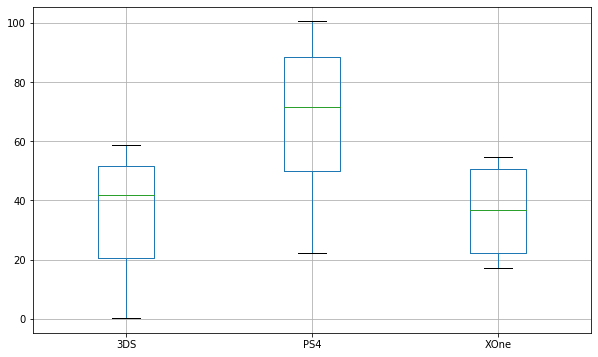

In [97]:
final_data.pivot_table(index = 'year_of_release',columns ='platform',  values='total_sales', aggfunc='sum').boxplot(figsize=(10,6), grid=True);

По диаграмме разброса, мы видим лидера по продажам за выбранный актуальный период. Продажи второй платформы в среднем около 70 млн. Две других платформы имеют примерно одинаковые средние продажи, около 40 млн. 


Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

0.4106565329614494


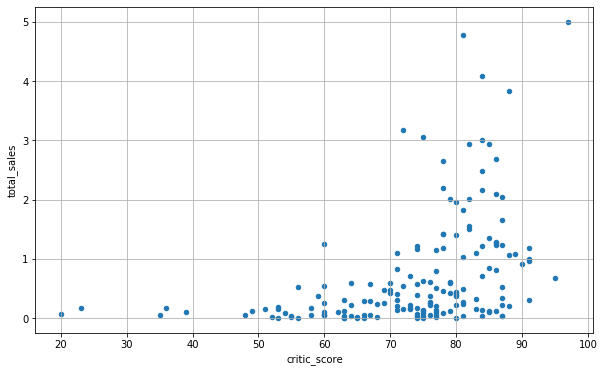

In [99]:
XOne_platform = final_data.query('platform == "XOne" & critic_score!=0 &user_score!=0')
XOne_platform.plot(x='critic_score', y='total_sales', figsize=(10,6), grid=True, kind='scatter');

print(XOne_platform['critic_score'].corr(XOne_platform['total_sales']))

-0.09373712936460944


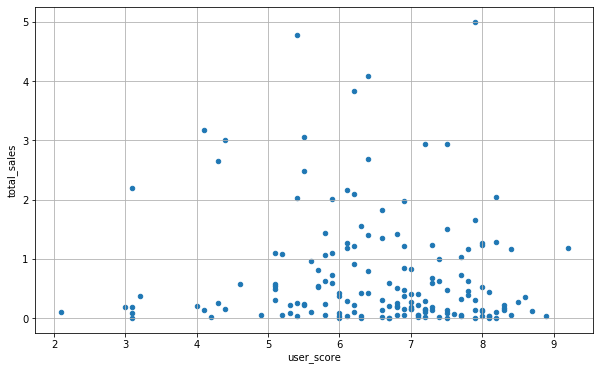

In [100]:
XOne_platform.plot(x='user_score', y='total_sales', figsize=(10,6), grid=True, kind='scatter');

print(XOne_platform['user_score'].corr(XOne_platform['total_sales']))

Для примера рассмотрения того, как отзывы влияют на продажи мы выбрали платформу XOne. На первой диаграмме рассеивания (отзывы критиков и общие продажи)мы видим, что тем рейтинг выше, тем выше продажи игры. Мы так же можем наблюдать точечные аномально большие значения, которые которые в основном наблюдаются при высоком рейтинге. На второй диаграмме мы видим, что корреляция гораздо ниже. Практически пользовательский рейтинг не влияяет на продажи игр. Так же имеются выдающиеся значения. В целом мы можем сказать, что рейтинг пользователей не сильно влияет на продажи, в то время как рейтинг критиков имеет больший вес. По выдающимся значеним можем сделать вывод, что имеются игры, или дополнения к играм котрые очень хорошо продаются, в не зависимости от любого рейтинга. 

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

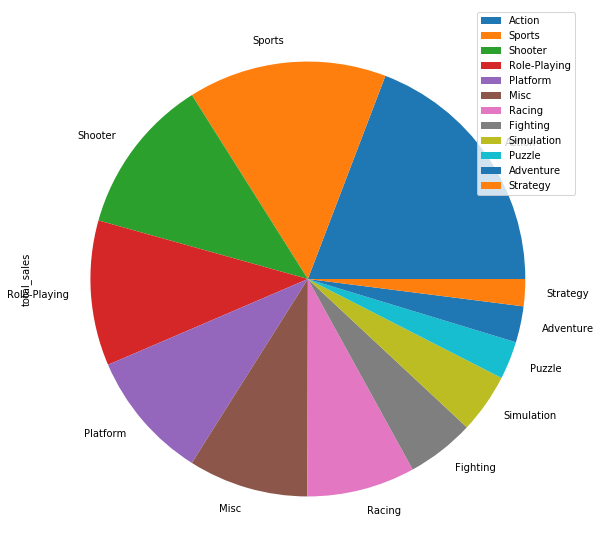

In [71]:
data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='pie', figsize=(10,10));

Из сводной таблицы видим, какие жанры лидируют по продажам и какие жанры не пользуются большим спросом. Можем сделать вывод, что такие жанры как экшн, спорт, шутеры, ролевые и платформы являются самыми популярными. В то время как стратегии, приключения и пазлы менее привлекательны для покупателя. 

Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [72]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,30.38


In [101]:
data_na = data.pivot_table(index='platform', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum').sort_values(by='na_sales', ascending = False)

In [102]:
data_share['share_na'] = data_share['na_sales'] / data_na['na_sales'].sum()
data_share['share_jp'] = data_share['jp_sales'] / data_na['jp_sales'].sum()
data_share['share_eu'] = data_share['eu_sales'] / data_na['eu_sales'].sum()

In [103]:
data_share.head(10)

,eu_sales,jp_sales,na_sales,share_na,share_jp,share_eu
platform,,,,,,
X360,269.79,12.33,599.15,0.147924,0.011147,0.114485
PS2,337.05,137.74,580.09,0.143219,0.124520,0.143026
Wii,261.48,69.05,494.01,0.121966,0.062423,0.110958
PS3,328.97,79.52,391.60,0.096682,0.071888,0.139598
DS,188.72,175.02,381.38,0.094159,0.158222,0.080083
PS,212.39,139.78,334.72,0.082639,0.126364,0.090127
XB,60.72,1.38,185.91,0.045899,0.001248,0.025766
GBA,74.82,46.56,184.73,0.045608,0.042091,0.031750
N64,41.06,34.05,139.02,0.034323,0.030782,0.017424


In [104]:
data_genre = data.pivot_table(index='genre', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum').sort_values(by='na_sales', ascending = False)

In [105]:
data_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,510.06,147.31,825.21
Sports,372.17,109.88,668.06
Shooter,313.24,31.75,536.82
Misc,210.41,100.99,396.04
Racing,231.30,46.87,343.86
Platform,176.24,84.07,333.71
Role-Playing,188.14,321.89,328.49
Fighting,95.67,72.11,208.80
Simulation,112.02,62.06,177.84


In [106]:
data_rating = data.pivot_table(index='rating', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum').sort_values(by='na_sales', ascending = False)

In [107]:
data_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,709.20,198.02,1288.00
0,552.08,652.00,906.30
T,422.76,150.88,751.24
M,483.17,63.61,746.93
E10+,188.32,40.20,352.56
K-A,0.27,1.46,2.56
EC,0.11,0.00,1.53
AO,0.61,0.00,1.26
RP,0.04,0.00,0.00


Анализа суммарных продаж по регионам было решего фильтровать по Северной Америке, так как у нее самый большой обьем продаж. После анализа мы видим, что в Северной Амнрике по суммарной доле продаж две из трех платформы, которые мы выбрали для анализа занимают большее место. По жанрам Америка так же отдает предпочтения жанрам, которые занимают лидирующие продажи по всем регионам. 
По рейтингу мы видим что лидируют игры для всех, игры без сециального рейтинга, для тинейджеров и для взрослых. 
Для Европы ТОП 3 платформы по продажам совпадают с теми, которые мы выбрали для дальнейшего анализа. Так же совпадает и жанры. Поодажи по рейтингу распределены между теми же категориями, что и у Америки. 
Отличные показатели у Японии. Две их трех лидирующих платфолрм никак не фигурируют в платформах, которые были отобраны для анализы и в других регионах. Самые популярные жанры так же совпадают с другими регионами. По рейтингу мы видим, что покупатель в Японии предпочтение отдает играм без определенного рейтинга, далее идут игры для всех (с очень большим отрывом)

Можем сделать вывод, что жанровые предпочтения примерно одинаковы во всех регионах, популярность конкретных платформ немного зависит от региона (как в случае с Японией), но в целом ТОП платформ определен Продажи в зависимости от рейтинга совпадают по популярности в Европе и Америке, и сильно отличаются в Японии. Возможно. дело в в специфики конкретного региона, либо в не поппулярности данного рейтинга в стране. 

Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Формулируем нулевую и альтернативную гипотезу:

HO - средние пользовательские рейтинги равны

H1- средние пользовательские рейтинги не равны

пороговое значение - .05

Порогвое значение альфа было выбрано, исходя из гото чтобы минимализировать допущение ошибки первого рода. 

In [108]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,30.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92


In [109]:
rating_mean_Xbox = data.loc[data['platform'] == 'XOne', 'user_score']
rating_mean_PC = data.loc[data['platform'] == 'PC', 'user_score']

rating_res = st.ttest_ind(rating_mean_Xbox,rating_mean_PC)
alpha = .05

print('p-значение: ', rating_res.pvalue)
    
if (rating_res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.00040591432393264655
Отвергаем нулевую гипотезу


Можем сделать вывод, что средние пользовательские рейтинги не равны. 

Проверим вторую гипотезу. 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


HO - средние пользовательские рейтинги одинаковые 

H1- средние пользовательские рейтинги не одинаковые

пороговое значение - .05

Порогвое значение альфа было выбрано, исходя из гото чтобы минимализировать допущение ошибки первого рода. 

In [110]:
rating_mean_action = data.loc[data['genre'] == 'Action', 'user_score']
rating_mean_sports = data.loc[data['genre'] == 'Sports', 'user_score']

rating_res2 = st.ttest_ind(rating_mean_action,rating_mean_sports)
alpha2 = .05

print('p-значение: ', rating_res2.pvalue)
    
if (rating_res2.pvalue < alpha2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  2.1105407109756075e-09
Отвергаем нулевую гипотезу


Можем сделать выводы, что средние пользовательские рейтинги для двух жанров разные. 

Общий вывод по проекту: 

Для планирования компании на слежующий год нужно обязательно учитывать регион продаж.  Стоит так же учитывать популярность платформ в том или ином регионе. Анализ показал, что в среднем новые платформы появляются каждые 5 лет и за это время у них случайется 1-2 пика продаж. Стоит рассматривать платформа не старше 2014/2015 года выпуска, так как у них сейчас потенциально самые выйгрышные позициии. ТАк же в зависимости от региона стоит рассматривать наличие или отсутствия официального рейтинга игры. Для Японии этот рейтинг не важен, в то время как в Америке и Европе он способствует большим продажам. Так же можно отметить, что потенциальные покупатели больше доверяют отзывам пользователей, чем критиков. Следует внимательно изучить отзывы на прошлые версии игр (если планируется новая версия, например)
По жанрам ТОП остается неизменным в независимости от региона. 
Успешность продаж можно определить как правильно определенный (продаваемый) жанр смой игры , популярность конкретной платформы (в зависимости от региона) и влиянием рейтинга на продажи (в последнюю очередь). Для планирования планирования рекламной компании на 2017 год рекомендуется отдать предпочтения полулярным жанрам (которые являются одинаковыми для трех регионов. Для выхода на японский рынок следует рассмотреть такие платформы как DS, PS, PS2. Стоит так же учитывать, что для японских покупателей рейтинг не играет ключевую роль при принятии решения о покупке. ДЛя выхода на Американский рынок следует обратить внимание на PS2, X360, PS, DS платформы. Позьватели из Америки больше уделяют внимания рейтингу игры, стоит учитывать этот фактор при выборе игр. 
